#### 1. Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [379]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import adjusted_rand_score

In [500]:
boston = load_boston()
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [501]:
print("feature names ->")
print(boston.feature_names)
bos=pd.DataFrame(boston.data, columns=boston.feature_names)
bos.head(2)

feature names ->
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [502]:
bos.columns=boston.feature_names
bos['MEDV']=boston.target
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [503]:
#create categorial predictors
mask_RAD=pd.get_dummies(bos.RAD,prefix='RAD').iloc[: ,1:]
bos=pd.concat([bos,mask_RAD],axis=1)

In [505]:
bos.rename(columns={"RAD_2.0":"RAD_2","RAD_3.0":"RAD_3","RAD_4.0":"RAD_4","RAD_5.0":"RAD_5","RAD_6.0":"RAD_6","RAD_7.0":"RAD_7","RAD_8.0":"RAD_8","RAD_24.0":"RAD_24"},inplace=True)
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,MEDV,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,4.98,24.0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,9.14,21.6,1,0,0,0,0,0,0,0


In [506]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,MEDV,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,...,12.653063,22.532806,0.047431,0.075099,0.217391,0.227273,0.051383,0.033597,0.047431,0.260870
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,...,7.141062,9.197104,0.212769,0.263812,0.412879,0.419485,0.220997,0.180367,0.212769,0.439543
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,...,1.730000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,...,6.950000,17.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,...,11.360000,21.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,...,16.955000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,...,37.970000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


skew  :   1.1080984082549072
std dev :  9.188011545278206
Mean :  22.532806324110698


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


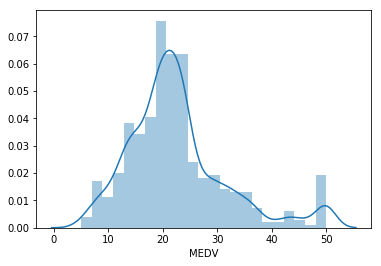

In [448]:
import seaborn as sns
sns.distplot(bos.MEDV)
print("skew  :  ",bos.MEDV.skew())
print("std dev : ",np.std(bos.MEDV))
print("Mean : ",np.mean(bos.MEDV))

Text(0,0.5,'count')

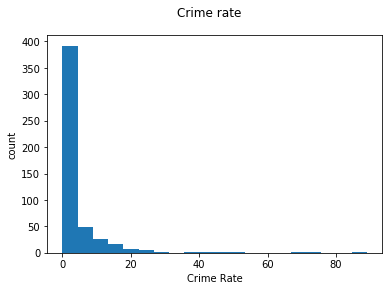

In [335]:
#Check the scweness in data for each categorical column
plt.hist(bos.CRIM,bins=20)
plt.suptitle("Crime rate")
plt.xlabel("Crime Rate")
plt.ylabel("count")

Text(0,0.5,'count')

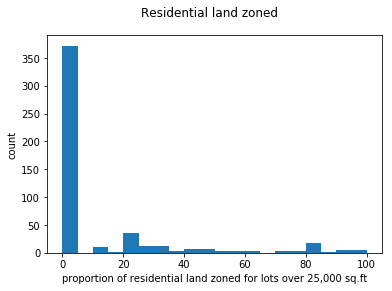

In [336]:
plt.hist(bos.ZN,bins=20)
plt.suptitle("Residential land zoned")
plt.xlabel("proportion of residential land zoned for lots over 25,000 sq.ft")
plt.ylabel("count")

Text(0,0.5,'count')

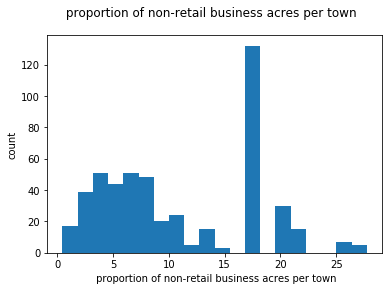

In [337]:
#Check the scweness in data for each categorical column
plt.hist(bos.INDUS,bins=20)
plt.suptitle(" proportion of non-retail business acres per town")
plt.xlabel(" proportion of non-retail business acres per town")
plt.ylabel("count")

Text(0,0.5,'count')

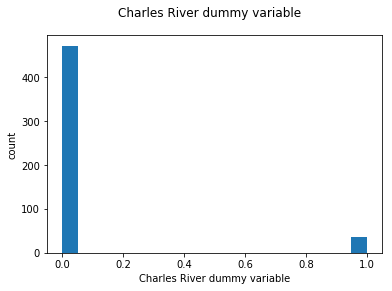

In [338]:
#Check the scweness in data for each categorical column
plt.hist(bos.CHAS,bins=20)
plt.suptitle("Charles River dummy variable")
plt.xlabel("Charles River dummy variable")
plt.ylabel("count")

Text(0,0.5,'count')

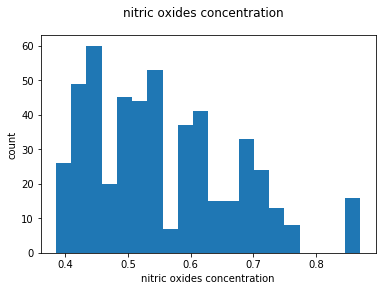

In [339]:
#Check the scweness in data for each categorical column
plt.hist(bos.NOX,bins=20)
plt.suptitle("nitric oxides concentration")
plt.xlabel("nitric oxides concentration")
plt.ylabel("count")

Text(0,0.5,'count')

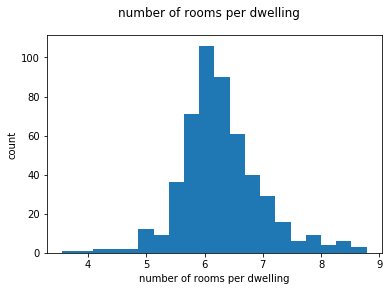

In [340]:
#Check the scweness in data for each categorical column
plt.hist(bos.RM,bins=20)
plt.suptitle("number of rooms per dwelling")
plt.xlabel("number of rooms per dwelling")
plt.ylabel("count")

Text(0,0.5,'count')

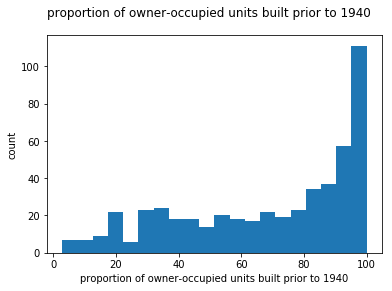

In [350]:
#Check the scweness in data for each categorical column
plt.hist(bos.AGE,bins=20)
plt.suptitle("proportion of owner-occupied units built prior to 1940")
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("count")

Text(0,0.5,'count')

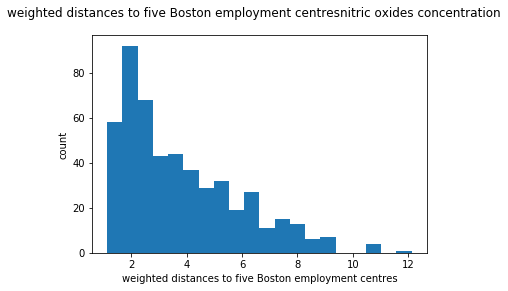

In [349]:
#Check the scweness in data for each categorical column
plt.hist(bos.DIS,bins=20)
plt.suptitle("weighted distances to five Boston employment centresnitric oxides concentration")
plt.xlabel("weighted distances to five Boston employment centres")
plt.ylabel("count")

Text(0,0.5,'count')

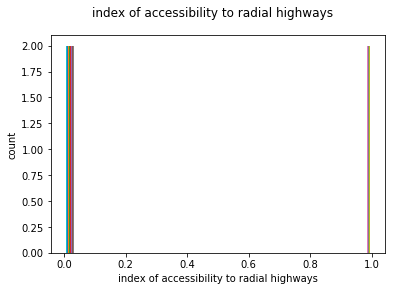

In [359]:

#Check the scweness in data for each categorical column
plt.hist(bos['RAD_24.0'],bins=20)
plt.suptitle("index of accessibility to radial highways")
plt.xlabel("index of accessibility to radial highways")
plt.ylabel("count")

Text(0,0.5,'count')

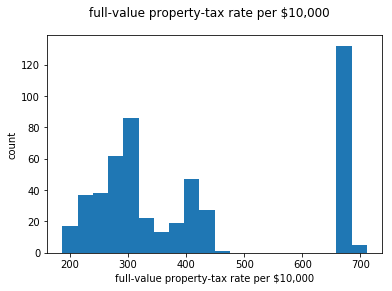

In [188]:
#Check the scweness in data for each categorical column
plt.hist(bos.TAX,bins=20)
plt.suptitle("full-value property-tax rate per $10,000")
plt.xlabel("full-value property-tax rate per $10,000")
plt.ylabel("count")

Text(0,0.5,'count')

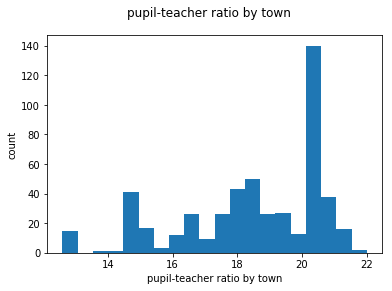

In [189]:
#Check the scweness in data for each categorical column
plt.hist(bos.PTRATIO,bins=20)
plt.suptitle("pupil-teacher ratio by town")
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("count")

Text(0,0.5,'count')

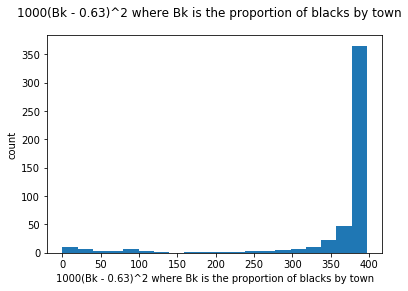

In [191]:
#Check the scweness in data for each categorical column
plt.hist(bos.B,bins=20)
plt.suptitle("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("count")

Text(0,0.5,'count')

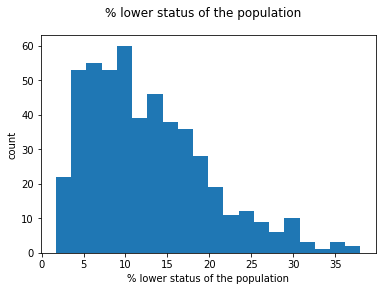

In [192]:
#Check the scweness in data for each categorical column
plt.hist(bos.LSTAT,bins=20)
plt.suptitle("% lower status of the population")
plt.xlabel("% lower status of the population")
plt.ylabel("count")

In [419]:
#corr() method will display the corelation between columns
corr=bos.corr()
corr['MEDV']

CRIM       -0.385832
ZN          0.360445
INDUS      -0.483725
CHAS        0.175260
NOX        -0.427321
RM          0.695360
AGE        -0.376955
DIS         0.249929
RAD        -0.381626
TAX        -0.468536
PTRATIO    -0.507787
B           0.333461
LSTAT      -0.737663
MEDV        1.000000
RAD_2.0     0.104444
RAD_3.0     0.167352
RAD_4.0    -0.065711
RAD_5.0     0.187356
RAD_6.0    -0.039411
RAD_7.0     0.092802
RAD_8.0     0.190053
RAD_24.0   -0.396297
Name: MEDV, dtype: float64

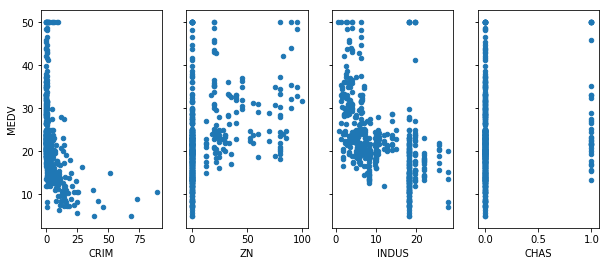

In [426]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
bos.plot(kind='scatter', x='CRIM', y='MEDV', ax=axs[0], figsize=(10, 4))
bos.plot(kind='scatter', x='ZN', y='MEDV', ax=axs[1])
bos.plot(kind='scatter', x='INDUS', y='MEDV', ax=axs[2])
bos.plot(kind='scatter', x='CHAS', y='MEDV', ax=axs[3])

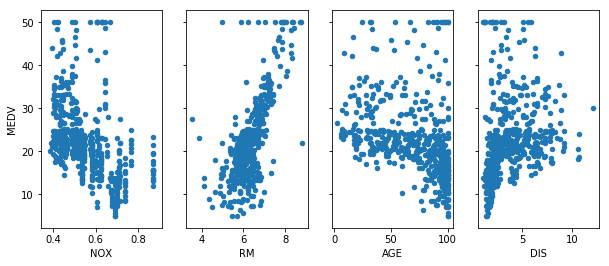

In [427]:
fig1, axs1 = plt.subplots(1, 4, sharey=True)
bos.plot(kind='scatter', x='NOX', y='MEDV', ax=axs1[0], figsize=(10, 4))
bos.plot(kind='scatter', x='RM', y='MEDV', ax=axs1[1])
bos.plot(kind='scatter', x='AGE', y='MEDV', ax=axs1[2])
bos.plot(kind='scatter', x='DIS', y='MEDV', ax=axs1[3])


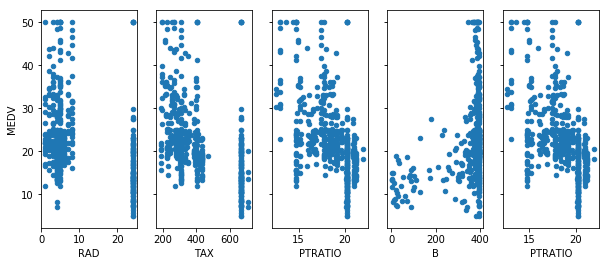

In [428]:
fig2, axs2 = plt.subplots(1, 5, sharey=True)
bos.plot(kind='scatter', x='RAD', y='MEDV', ax=axs2[0], figsize=(10, 4))
bos.plot(kind='scatter', x='TAX', y='MEDV', ax=axs2[1])
bos.plot(kind='scatter', x='PTRATIO', y='MEDV', ax=axs2[2])
bos.plot(kind='scatter', x='B', y='MEDV', ax=axs2[3])
bos.plot(kind='scatter', x='PTRATIO', y='MEDV', ax=axs2[4])

In [507]:
#Check null value
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
RAD_2      0
RAD_3      0
RAD_4      0
RAD_5      0
RAD_6      0
RAD_7      0
RAD_8      0
RAD_24     0
dtype: int64

In [509]:
# no null values then create Linear model
feature_name = bos.columns
X= bos[feature_name]
del X['RAD']
y = bos['MEDV']

In [510]:
#Create test and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [511]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [512]:
model1.coef_

array([ 8.15983118e-16, -7.94945694e-17, -2.12426015e-15, -1.04126804e-14,
       -2.42182727e-14, -5.05892461e-15, -1.87656284e-16, -1.44768443e-15,
       -1.47730895e-16, -4.00252880e-16, -5.55494573e-16,  7.78482273e-16,
        1.00000000e+00, -7.88243762e-16,  1.75866342e-16,  1.18886358e-16,
        4.59146037e-16,  1.08733706e-15,  1.07535779e-15,  9.18913365e-16,
        1.00357733e-15])

In [513]:
model1.intercept_

3.161915174132446e-13

In [523]:
#Evaluate model Trainig score
model1.score(X_train,y_train)

1.0

In [524]:
#Evaluate model Trainig score
model1.score(X_test,y_test)

1.0

In [516]:
#from sklearn.metrics import confusion_matrix
#y_pred=model1.predict(X_test)
#confusion_matrix(y_test,y_pred)

#Geting error ---> ValueError: continuous is not supported

In [517]:
# calculate r-square and mean square error
print("r-square : ", r2_score(y_test,y_pred))
print("r-square Error : ",mean_squared_error(y_test,y_pred))

# adjR2 = 1 - ((1-R2)**2)(n-1/n-p-1)  => 1/ R2 = 0 as R2==1
print ("Adj R-sqr : ", 1.0)

r-square :  1.0
r-square Error :  2.1762492627809604e-27
Adj R-sqr :  1.0


Text(0,0.5,'Actual price')

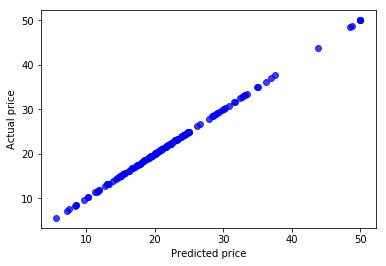

In [518]:
# Scatter plot pred vs actual
plt.scatter(y_pred,y_test,alpha=.75,color='b')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')

In [452]:
import statsmodels.formula.api as smf

In [520]:
output = smf.ols(formula='MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+B+PTRATIO+LSTAT+RAD_2+RAD_3+RAD_4+RAD_5+RAD_6+RAD_7+RAD_8+RAD_24',data=bos).fit()

In [522]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     72.69
Date:                Mon, 04 Feb 2019   Prob (F-statistic):          8.53e-132
Time:                        14:09:50   Log-Likelihood:                -1489.7
No. Observations:                 506   AIC:                             3021.
Df Residuals:                     485   BIC:                             3110.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.8318      5.430      6.414      0.000      24.162      45.501
CRIM          -0.1080      0.033     -3.321      0.001      -0.172      -0.044
ZN             0.0549      0.014      3.879      0.000       0.027       0.083
INDUS          0.0241      0.064      0.378      0.705      -0.101       0.149
CHAS           2.5258      0.863      2.926      0.004       0.830       4.222
NOX          -17.6044      3.897     -4.517      0.000     -25.262      -9.947
RM             3.6603      0.421      8.689      0.000       2.833       4.488
AGE            0.0005      0.013      0.039      0.969      -0.025       0.027
DIS           -1.5549      0.202     -7.700      0.000      -1.952      -1.158
RAD            0.4561      0.099      4.605      0.000       0.262       0.651
TAX           -0.0087      0.004     -2.244      0.025      -0.016      -0.001
B              0.0095      0.003      3.564      0.000       0.004       0.015
PTRATIO       -0.9730      0.144     -6.734      0.000      -1.257      -0.689
LSTAT         -0.5299      0.051    -10.470      0.000      -0.629      -0.430
RAD_2          1.0327      1.427      0.724      0.470      -1.771       3.836
RAD_3          3.7692      1.222      3.084      0.002       1.368       6.170
RAD_4          1.2075      0.967      1.249      0.212      -0.692       3.107
RAD_5          1.0950      0.931      1.176      0.240      -0.734       2.924
RAD_6         -1.0952      1.152     -0.951      0.342      -3.359       1.169
RAD_7          2.1432      1.273      1.684      0.093      -0.358       4.644
RAD_8          1.6479      1.122      1.469      0.143      -0.557       3.852
RAD_24        -3.0377      0.890     -3.412      0.001      -4.787      -1.288
==============================================================================
Omnibus:                      183.889   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              857.666
Skew:                           1.554   Prob(JB):                    5.76e-187
Kurtosis:                       8.569   Cond. No.                     2.76e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""